# LBM lighting test
> LBM lighting test

In [1]:
#| default_exp lbm_lighting

In [2]:
#| hide
%load_ext autoreload
%autoreload 2


In [3]:
#| export
import sys
from pathlib import Path


In [4]:
#| export
CV_TOOLS = Path(r'/home/ai_sintercra/homes/hasan/projects/git_data/cv_tools')
sys.path.append(str(CV_TOOLS))


In [5]:
#| export
custom_lib_path = Path(r'/home/ai_warstein/homes/goni/custom_libs')
sys.path.append(str(custom_lib_path))


In [6]:
#| export
from cv_tools.imports import *
from cv_tools.core import *
from dotenv import load_dotenv


In [0]:
#| export
load_dotenv(dotenv_path=f'/home/ai_sintercra/Users/goni/workspace/projects/git_data/labeling_test/labeling_test/.env')

In [7]:
import torch
from diffusers.utils import load_image
from lbm.inference import evaluate, get_model

In [10]:
import torch
print(torch.cuda.is_available())

True


# Relighting model

In [8]:
# Load model
model = get_model(
  "jasperai/LBM_relighting",
  torch_dtype=torch.bfloat16,
  device="cuda",
)

Fetching 7 files:   0%|          | 0/7 [00:00<?, ?it/s]

The config attributes {'clip_sample': False, 'sample_max_value': 1.0, 'set_alpha_to_one': False, 'skip_prk_steps': True} were passed to FlowMatchEulerDiscreteScheduler, but are not expected and will be ignored. Please verify your scheduler_config.json configuration file.
INFO:root:Loading safetensors file: model.safetensors


In [11]:
# Load a source image
source_image = load_image(
  "https://huggingface.co/jasperai/LBM_relighting/resolve/main/assets/source_image.jpg"
)

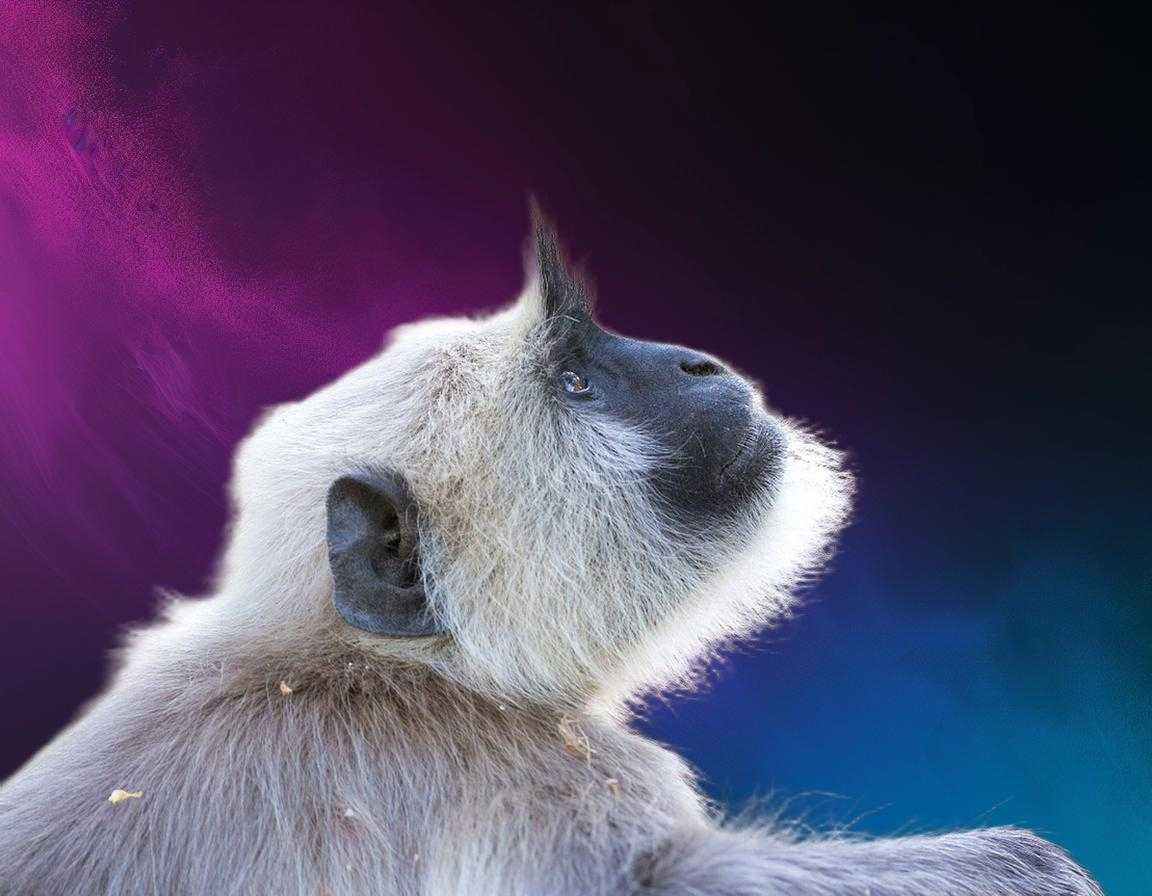

In [14]:
type(source_image)
source_image

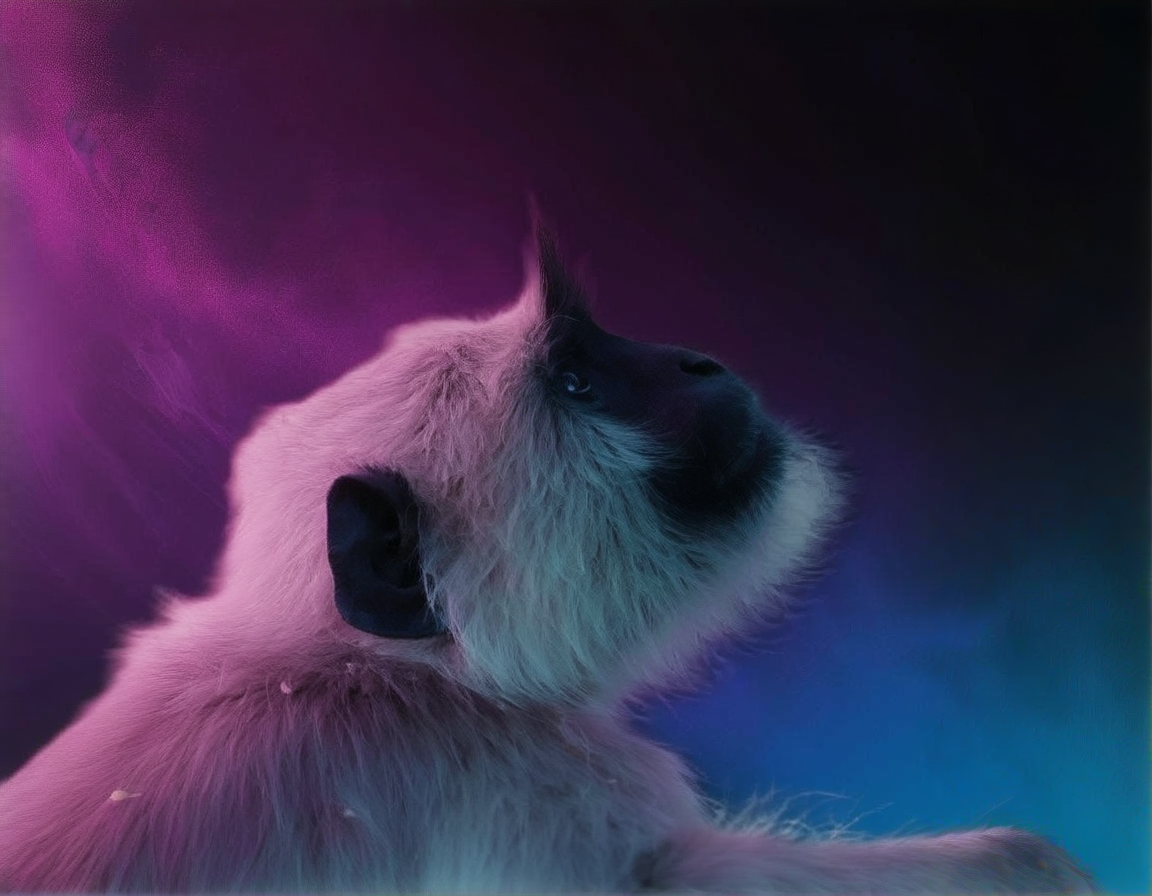

In [15]:
output_image = evaluate(
    model, 
    source_image, 
    num_sampling_steps=1)
output_image


> Gradio app [link](https://huggingface.co/spaces/jasperai/LBM_relighting/blob/main/app.py)

# Depth map model

In [17]:
# Depth map
# Load model
model = get_model(
  "jasperai/LBM_depth",
  torch_dtype=torch.bfloat16,
  device="cuda",
)

Fetching 4 files:   0%|          | 0/4 [00:00<?, ?it/s]

model.safetensors:  37%|###7      | 2.96G/7.98G [00:00<?, ?B/s]

The config attributes {'clip_sample': False, 'sample_max_value': 1.0, 'set_alpha_to_one': False, 'skip_prk_steps': True} were passed to FlowMatchEulerDiscreteScheduler, but are not expected and will be ignored. Please verify your scheduler_config.json configuration file.
INFO:root:Loading safetensors file: model.safetensors


In [18]:
output_image = evaluate(
    model, 
    source_image, 
    num_sampling_steps=1)



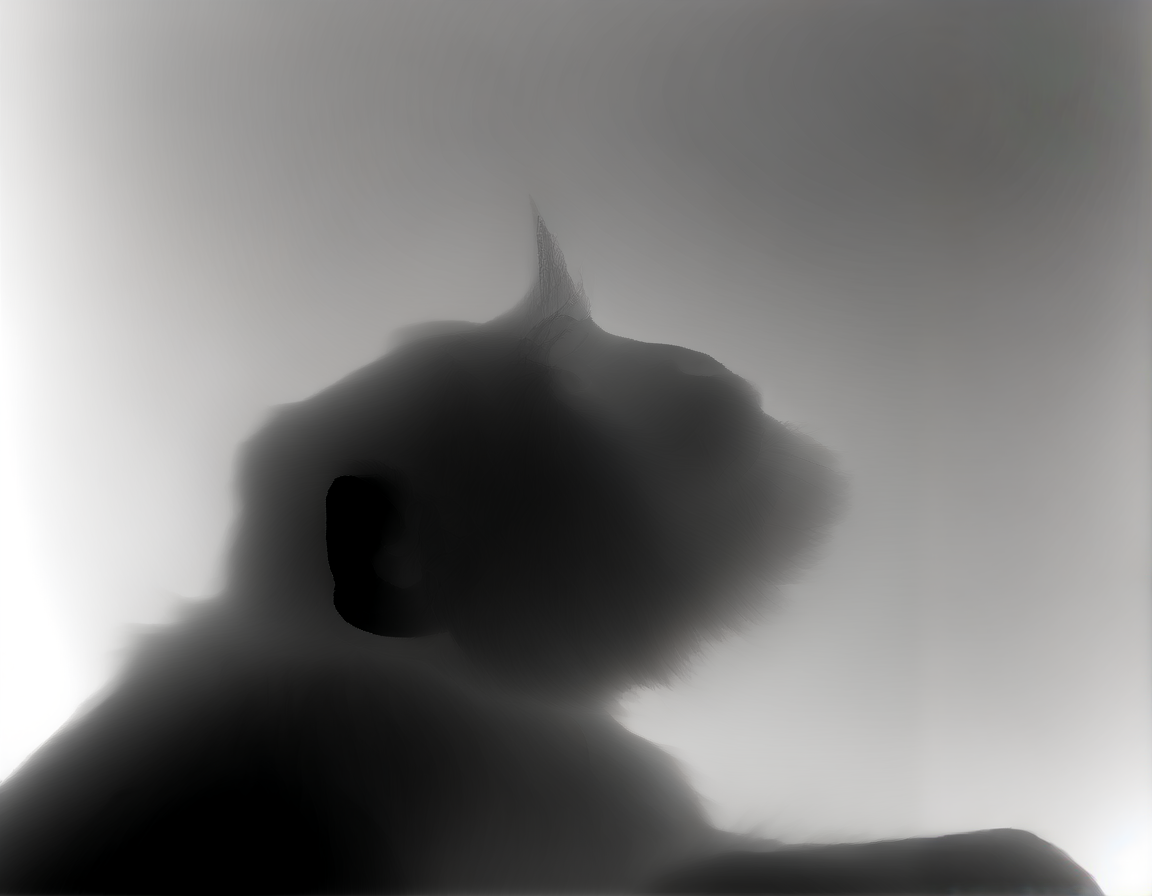

In [19]:
output_image

In [ ]:
# Normal Model

In [20]:
# Depth map
# Load model
model = get_model(
  "jasperai/LBM_normals",
  torch_dtype=torch.bfloat16,
  device="cuda",
)

Fetching 4 files:   0%|          | 0/4 [00:00<?, ?it/s]

config.yaml:   0%|          | 0.00/336 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/2.05k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/5.02G [00:00<?, ?B/s]

.gitattributes:   0%|          | 0.00/1.52k [00:00<?, ?B/s]

The config attributes {'clip_sample': False, 'sample_max_value': 1.0, 'set_alpha_to_one': False, 'skip_prk_steps': True} were passed to FlowMatchEulerDiscreteScheduler, but are not expected and will be ignored. Please verify your scheduler_config.json configuration file.
INFO:root:Loading safetensors file: model.safetensors


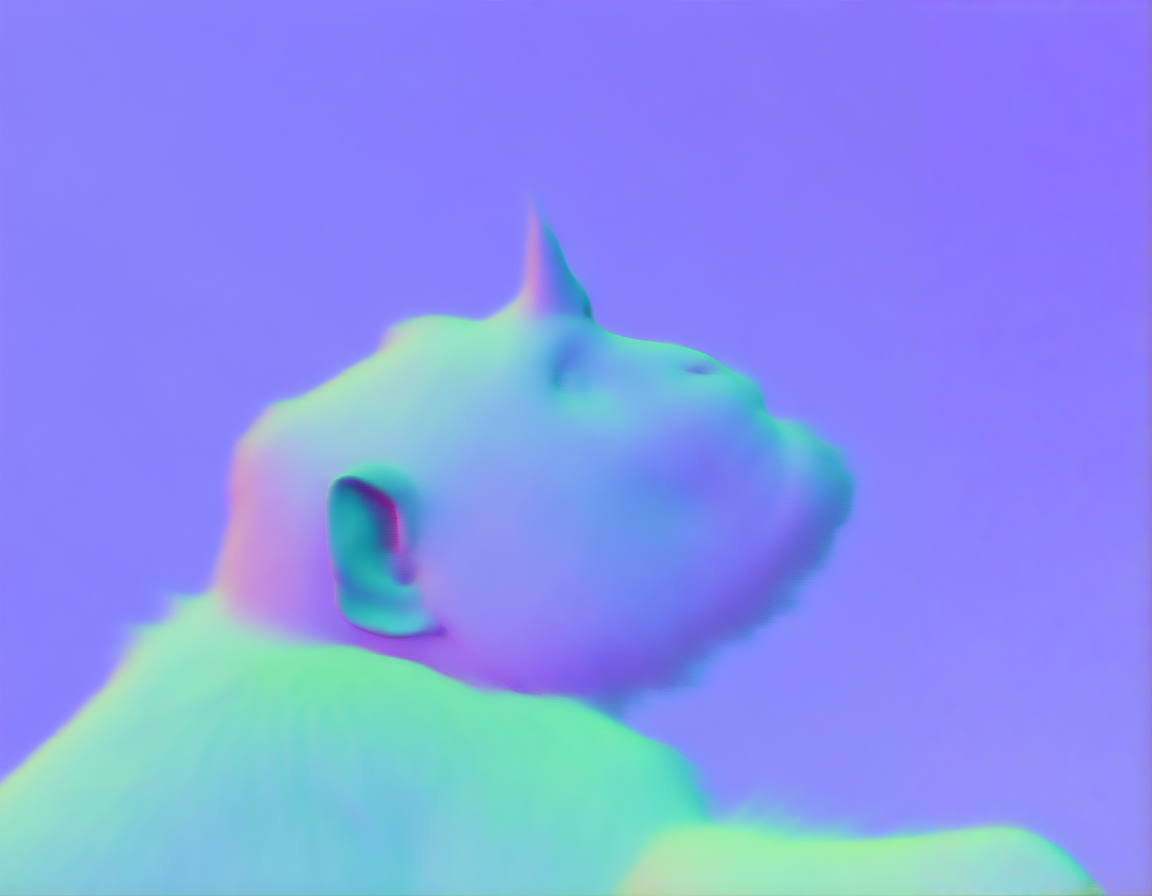

In [21]:
output_image = evaluate(
    model, 
    source_image, 
    num_sampling_steps=1)
output_image


In [0]:
#| export
CURRETNT_NB='/home/ai_sintercra/Users/goni/workspace/projects/git_data/labeling_test/nbs'

In [0]:
#| hide
import nbdev; nbdev.nbdev_export('10_lbm_relighting.ipynb')